<a href="https://colab.research.google.com/github/lfa-systems/Telecom_X/blob/main/TelecomX_BR.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#📌 Extracão

In [739]:
import pandas as pd

In [740]:
url = 'https://raw.githubusercontent.com/lfa-systems/Telecom_X/refs/heads/main/dados/TelecomX_Data.json'

In [741]:
dados = pd.read_json(url)

In [742]:
dados.head()

,customerID,Churn,customer,phone,internet,account
0,0002-ORFBO,No,"{'gender': 'Female', 'SeniorCitizen': 0, 'Part...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'DSL', 'OnlineSecurity': '...","{'Contract': 'One year', 'PaperlessBilling': '..."
1,0003-MKNFE,No,"{'gender': 'Male', 'SeniorCitizen': 0, 'Partne...","{'PhoneService': 'Yes', 'MultipleLines': 'Yes'}","{'InternetService': 'DSL', 'OnlineSecurity': '...","{'Contract': 'Month-to-month', 'PaperlessBilli..."
2,0004-TLHLJ,Yes,"{'gender': 'Male', 'SeniorCitizen': 0, 'Partne...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'Fiber optic', 'OnlineSecu...","{'Contract': 'Month-to-month', 'PaperlessBilli..."
3,0011-IGKFF,Yes,"{'gender': 'Male', 'SeniorCitizen': 1, 'Partne...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'Fiber optic', 'OnlineSecu...","{'Contract': 'Month-to-month', 'PaperlessBilli..."
4,0013-EXCHZ,Yes,"{'gender': 'Female', 'SeniorCitizen': 1, 'Part...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'Fiber optic', 'OnlineSecu...","{'Contract': 'Month-to-month', 'PaperlessBilli..."


In [743]:
dados.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7267 entries, 0 to 7266
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   customerID  7267 non-null   object
 1   Churn       7267 non-null   object
 2   customer    7267 non-null   object
 3   phone       7267 non-null   object
 4   internet    7267 non-null   object
 5   account     7267 non-null   object
dtypes: object(6)
memory usage: 340.8+ KB


In [744]:
# Igualar coluna como lista de dicionários para apenas coluna com prefixo da coluna original
df = dados.copy()
for nome_coluna in dados.columns:
    if isinstance(dados[nome_coluna].iloc[0], dict):
       temp_normalizado = pd.json_normalize(dados[nome_coluna])
       df = pd.concat([df, temp_normalizado.add_prefix(f'{nome_coluna}_')], axis=1).drop(nome_coluna, axis=1)

df.head()

,customerID,Churn,customer_gender,customer_SeniorCitizen,customer_Partner,customer_Dependents,customer_tenure,phone_PhoneService,phone_MultipleLines,internet_InternetService,...,internet_OnlineBackup,internet_DeviceProtection,internet_TechSupport,internet_StreamingTV,internet_StreamingMovies,account_Contract,account_PaperlessBilling,account_PaymentMethod,account_Charges.Monthly,account_Charges.Total
0,0002-ORFBO,No,Female,0,Yes,Yes,9,Yes,No,DSL,...,Yes,No,Yes,Yes,No,One year,Yes,Mailed check,65.6,593.3
1,0003-MKNFE,No,Male,0,No,No,9,Yes,Yes,DSL,...,No,No,No,No,Yes,Month-to-month,No,Mailed check,59.9,542.4
2,0004-TLHLJ,Yes,Male,0,No,No,4,Yes,No,Fiber optic,...,No,Yes,No,No,No,Month-to-month,Yes,Electronic check,73.9,280.85
3,0011-IGKFF,Yes,Male,1,Yes,No,13,Yes,No,Fiber optic,...,Yes,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,98.0,1237.85
4,0013-EXCHZ,Yes,Female,1,Yes,No,3,Yes,No,Fiber optic,...,No,No,Yes,Yes,No,Month-to-month,Yes,Mailed check,83.9,267.4


In [745]:
# Conhecendo valores únicos das colunas
def ValoresUnicos():
  for nome_coluna in df.columns:
      print(f'{nome_coluna}\n',df[nome_coluna].unique())
ValoresUnicos()

customerID
 ['0002-ORFBO' '0003-MKNFE' '0004-TLHLJ' ... '9992-UJOEL' '9993-LHIEB'
 '9995-HOTOH']
Churn
 ['No' 'Yes' '']
customer_gender
 ['Female' 'Male']
customer_SeniorCitizen
 [0 1]
customer_Partner
 ['Yes' 'No']
customer_Dependents
 ['Yes' 'No']
customer_tenure
 [ 9  4 13  3 71 63  7 65 54 72  5 56 34  1 45 50 23 55 26 69 11 37 49 66
 67 20 43 59 12 27  2 25 29 14 35 64 39 40  6 30 70 57 58 16 32 33 10 21
 61 15 44 22 24 19 47 62 46 52  8 60 48 28 41 53 68 51 31 36 17 18 38 42
  0]
phone_PhoneService
 ['Yes' 'No']
phone_MultipleLines
 ['No' 'Yes' 'No phone service']
internet_InternetService
 ['DSL' 'Fiber optic' 'No']
internet_OnlineSecurity
 ['No' 'Yes' 'No internet service']
internet_OnlineBackup
 ['Yes' 'No' 'No internet service']
internet_DeviceProtection
 ['No' 'Yes' 'No internet service']
internet_TechSupport
 ['Yes' 'No' 'No internet service']
internet_StreamingTV
 ['Yes' 'No' 'No internet service']
internet_StreamingMovies
 ['No' 'Yes' 'No internet service']
account_Contrac

In [746]:
# Manter o contexto das condições Verdadeiro/Falso
def strbool(v):
  '''
  Função para converter string para booleano
  Por: Luciano Azevedo
  Entrada: String
  Saída: Booleano
  '''
  return v.lower() in ("yes", "true", "t", "1", 'dsl', 'fiber optic')

#🔧 Transformação

In [747]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7267 entries, 0 to 7266
Data columns (total 21 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   customerID                 7267 non-null   object 
 1   Churn                      7267 non-null   object 
 2   customer_gender            7267 non-null   object 
 3   customer_SeniorCitizen     7267 non-null   int64  
 4   customer_Partner           7267 non-null   object 
 5   customer_Dependents        7267 non-null   object 
 6   customer_tenure            7267 non-null   int64  
 7   phone_PhoneService         7267 non-null   object 
 8   phone_MultipleLines        7267 non-null   object 
 9   internet_InternetService   7267 non-null   object 
 10  internet_OnlineSecurity    7267 non-null   object 
 11  internet_OnlineBackup      7267 non-null   object 
 12  internet_DeviceProtection  7267 non-null   object 
 13  internet_TechSupport       7267 non-null   objec

In [748]:
df.loc[df['account_Charges.Total'] == ' ']

,customerID,Churn,customer_gender,customer_SeniorCitizen,customer_Partner,customer_Dependents,customer_tenure,phone_PhoneService,phone_MultipleLines,internet_InternetService,...,internet_OnlineBackup,internet_DeviceProtection,internet_TechSupport,internet_StreamingTV,internet_StreamingMovies,account_Contract,account_PaperlessBilling,account_PaymentMethod,account_Charges.Monthly,account_Charges.Total
975,1371-DWPAZ,No,Female,0,Yes,Yes,0,No,No phone service,DSL,...,Yes,Yes,Yes,Yes,No,Two year,No,Credit card (automatic),56.05,
1775,2520-SGTTA,No,Female,0,Yes,Yes,0,Yes,No,No,...,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.00,
1955,2775-SEFEE,No,Male,0,No,Yes,0,Yes,Yes,DSL,...,Yes,No,Yes,No,No,Two year,Yes,Bank transfer (automatic),61.90,
2075,2923-ARZLG,No,Male,0,Yes,Yes,0,Yes,No,No,...,No internet service,No internet service,No internet service,No internet service,No internet service,One year,Yes,Mailed check,19.70,
2232,3115-CZMZD,No,Male,0,No,Yes,0,Yes,No,No,...,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.25,
2308,3213-VVOLG,No,Male,0,Yes,Yes,0,Yes,Yes,No,...,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.35,
2930,4075-WKNIU,No,Female,0,Yes,Yes,0,Yes,Yes,DSL,...,Yes,Yes,Yes,Yes,No,Two year,No,Mailed check,73.35,
3134,4367-NUYAO,No,Male,0,Yes,Yes,0,Yes,Yes,No,...,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.75,
3203,4472-LVYGI,No,Female,0,Yes,Yes,0,No,No phone service,DSL,...,No,Yes,Yes,Yes,No,Two year,Yes,Bank transfer (automatic),52.55,
4169,5709-LVOEQ,No,Female,0,Yes,Yes,0,Yes,No,DSL,...,Yes,Yes,No,Yes,Yes,Two year,No,Mailed check,80.85,


In [749]:
df['account_Charges.Total'] = df['account_Charges.Total'].replace(' ', '0')
df

,customerID,Churn,customer_gender,customer_SeniorCitizen,customer_Partner,customer_Dependents,customer_tenure,phone_PhoneService,phone_MultipleLines,internet_InternetService,...,internet_OnlineBackup,internet_DeviceProtection,internet_TechSupport,internet_StreamingTV,internet_StreamingMovies,account_Contract,account_PaperlessBilling,account_PaymentMethod,account_Charges.Monthly,account_Charges.Total
0,0002-ORFBO,No,Female,0,Yes,Yes,9,Yes,No,DSL,...,Yes,No,Yes,Yes,No,One year,Yes,Mailed check,65.60,593.3
1,0003-MKNFE,No,Male,0,No,No,9,Yes,Yes,DSL,...,No,No,No,No,Yes,Month-to-month,No,Mailed check,59.90,542.4
2,0004-TLHLJ,Yes,Male,0,No,No,4,Yes,No,Fiber optic,...,No,Yes,No,No,No,Month-to-month,Yes,Electronic check,73.90,280.85
3,0011-IGKFF,Yes,Male,1,Yes,No,13,Yes,No,Fiber optic,...,Yes,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,98.00,1237.85
4,0013-EXCHZ,Yes,Female,1,Yes,No,3,Yes,No,Fiber optic,...,No,No,Yes,Yes,No,Month-to-month,Yes,Mailed check,83.90,267.4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7262,9987-LUTYD,No,Female,0,No,No,13,Yes,No,DSL,...,No,No,Yes,No,No,One year,No,Mailed check,55.15,742.9
7263,9992-RRAMN,Yes,Male,0,Yes,No,22,Yes,Yes,Fiber optic,...,No,No,No,No,Yes,Month-to-month,Yes,Electronic check,85.10,1873.7
7264,9992-UJOEL,No,Male,0,No,No,2,Yes,No,DSL,...,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,50.30,92.75
7265,9993-LHIEB,No,Male,0,Yes,Yes,67,Yes,No,DSL,...,No,Yes,Yes,No,Yes,Two year,No,Mailed check,67.85,4627.65


In [750]:
import numpy as np
linhas_com_espaco = df.loc[(df == ' ').any(axis=1)]
linhas_com_espaco

,customerID,Churn,customer_gender,customer_SeniorCitizen,customer_Partner,customer_Dependents,customer_tenure,phone_PhoneService,phone_MultipleLines,internet_InternetService,...,internet_OnlineBackup,internet_DeviceProtection,internet_TechSupport,internet_StreamingTV,internet_StreamingMovies,account_Contract,account_PaperlessBilling,account_PaymentMethod,account_Charges.Monthly,account_Charges.Total


In [751]:
df['account_Charges.Total'] = df['account_Charges.Total'].astype('float64')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7267 entries, 0 to 7266
Data columns (total 21 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   customerID                 7267 non-null   object 
 1   Churn                      7267 non-null   object 
 2   customer_gender            7267 non-null   object 
 3   customer_SeniorCitizen     7267 non-null   int64  
 4   customer_Partner           7267 non-null   object 
 5   customer_Dependents        7267 non-null   object 
 6   customer_tenure            7267 non-null   int64  
 7   phone_PhoneService         7267 non-null   object 
 8   phone_MultipleLines        7267 non-null   object 
 9   internet_InternetService   7267 non-null   object 
 10  internet_OnlineSecurity    7267 non-null   object 
 11  internet_OnlineBackup      7267 non-null   object 
 12  internet_DeviceProtection  7267 non-null   object 
 13  internet_TechSupport       7267 non-null   objec

In [752]:
print(df.isnull().sum())

customerID                   0
Churn                        0
customer_gender              0
customer_SeniorCitizen       0
customer_Partner             0
customer_Dependents          0
customer_tenure              0
phone_PhoneService           0
phone_MultipleLines          0
internet_InternetService     0
internet_OnlineSecurity      0
internet_OnlineBackup        0
internet_DeviceProtection    0
internet_TechSupport         0
internet_StreamingTV         0
internet_StreamingMovies     0
account_Contract             0
account_PaperlessBilling     0
account_PaymentMethod        0
account_Charges.Monthly      0
account_Charges.Total        0
dtype: int64


In [753]:
df['customerID'].duplicated().sum()

np.int64(0)

In [754]:
df.to_csv('TelecomX_Data.csv', index=False)

In [755]:
churn = df['Churn'].value_counts().to_frame().reset_index()
churn.columns = ['Churn', 'Total']
churn

,Churn,Total
0,No,5174
1,Yes,1869
2,,224


#📊 Carga e análise

In [756]:
# Filtrando os cliente que deixou ou não a empresa. Os sem resposta fica de fora
df_filtrado = df[df['Churn'].str.lower().isin(['yes', 'no'])].copy()
df_filtrado['Churn_Traduzido'] = df_filtrado['Churn'].str.lower().map({'yes': 'Sim', 'no': 'Não'})
Churn_counts = df_filtrado['Churn_Traduzido'].value_counts().reset_index()
Churn_counts.columns = ['Churn', 'Total']
Churn_counts

,Churn,Total
0,Não,5174
1,Sim,1869


In [757]:
df

,customerID,Churn,customer_gender,customer_SeniorCitizen,customer_Partner,customer_Dependents,customer_tenure,phone_PhoneService,phone_MultipleLines,internet_InternetService,...,internet_OnlineBackup,internet_DeviceProtection,internet_TechSupport,internet_StreamingTV,internet_StreamingMovies,account_Contract,account_PaperlessBilling,account_PaymentMethod,account_Charges.Monthly,account_Charges.Total
0,0002-ORFBO,No,Female,0,Yes,Yes,9,Yes,No,DSL,...,Yes,No,Yes,Yes,No,One year,Yes,Mailed check,65.60,593.30
1,0003-MKNFE,No,Male,0,No,No,9,Yes,Yes,DSL,...,No,No,No,No,Yes,Month-to-month,No,Mailed check,59.90,542.40
2,0004-TLHLJ,Yes,Male,0,No,No,4,Yes,No,Fiber optic,...,No,Yes,No,No,No,Month-to-month,Yes,Electronic check,73.90,280.85
3,0011-IGKFF,Yes,Male,1,Yes,No,13,Yes,No,Fiber optic,...,Yes,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,98.00,1237.85
4,0013-EXCHZ,Yes,Female,1,Yes,No,3,Yes,No,Fiber optic,...,No,No,Yes,Yes,No,Month-to-month,Yes,Mailed check,83.90,267.40
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7262,9987-LUTYD,No,Female,0,No,No,13,Yes,No,DSL,...,No,No,Yes,No,No,One year,No,Mailed check,55.15,742.90
7263,9992-RRAMN,Yes,Male,0,Yes,No,22,Yes,Yes,Fiber optic,...,No,No,No,No,Yes,Month-to-month,Yes,Electronic check,85.10,1873.70
7264,9992-UJOEL,No,Male,0,No,No,2,Yes,No,DSL,...,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,50.30,92.75
7265,9993-LHIEB,No,Male,0,Yes,Yes,67,Yes,No,DSL,...,No,Yes,Yes,No,Yes,Two year,No,Mailed check,67.85,4627.65


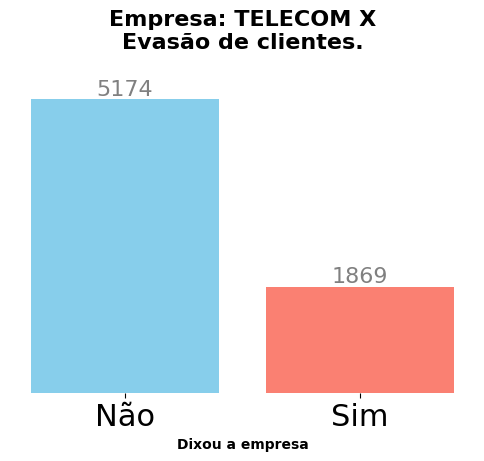

In [758]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots(figsize=(6, 4))
ax.bar(Churn_counts['Churn'], Churn_counts['Total'], color=['skyblue', 'salmon'])
# Adicionar rótulos e título
ax.set_xlabel('Dixou a empresa', fontweight='bold')
ax.set_title('Empresa: TELECOM X\nEvasão de clientes.', y=1.09, fontsize=16, fontweight='bold', loc='CENTER')
ax.xaxis.set_tick_params(labelsize=22)
ax.yaxis.set_ticks([])
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['bottom'].set_visible(False)
ax.spines['left'].set_visible(False)
# Adicionar os valores no topo das barras
for index, value in enumerate(Churn_counts['Total']):
    plt.text(index, value, str(value), ha='center', va='bottom', fontsize=16, color='gray')

plt.show()


In [759]:
df_filtrado.columns

Index(['customerID', 'Churn', 'customer_gender', 'customer_SeniorCitizen',
       'customer_Partner', 'customer_Dependents', 'customer_tenure',
       'phone_PhoneService', 'phone_MultipleLines', 'internet_InternetService',
       'internet_OnlineSecurity', 'internet_OnlineBackup',
       'internet_DeviceProtection', 'internet_TechSupport',
       'internet_StreamingTV', 'internet_StreamingMovies', 'account_Contract',
       'account_PaperlessBilling', 'account_PaymentMethod',
       'account_Charges.Monthly', 'account_Charges.Total', 'Churn_Traduzido'],
      dtype='object')

In [760]:
df_evadidos = df[df['Churn'].str.lower().isin(['yes'])].copy()
df_evadidos = df_evadidos[df_evadidos['phone_PhoneService'].str.lower().isin(['yes', 'no'])]
df_evadidos['PhoneService_Traduzido'] = df_evadidos['phone_PhoneService'].str.lower().map({'yes': 'Sim', 'no': 'Não'})
PhoneService_counts = df_evadidos['PhoneService_Traduzido'].value_counts().reset_index()
PhoneService_counts.columns = ['Phone Service', 'Total']
PhoneService_counts


,Phone Service,Total
0,Sim,1699
1,Não,170


In [761]:
df_evadidos = df[df['Churn'].str.lower().isin(['yes'])].copy()
df_evadidos = df_evadidos[df_evadidos['phone_MultipleLines'].str.lower().isin(['yes', 'no', 'no phone service'])]
df_evadidos['MultipleLines_Traduzido'] = df_evadidos['phone_MultipleLines'].str.lower().map({'yes': 'Sim', 'no': 'Não', 'no phone service':'Não'})
MultipleLines_counts = df_evadidos['MultipleLines_Traduzido'].value_counts().reset_index()
MultipleLines_counts.columns = ['Multiple Lines', 'Total']
MultipleLines_counts

,Multiple Lines,Total
0,Não,1019
1,Sim,850


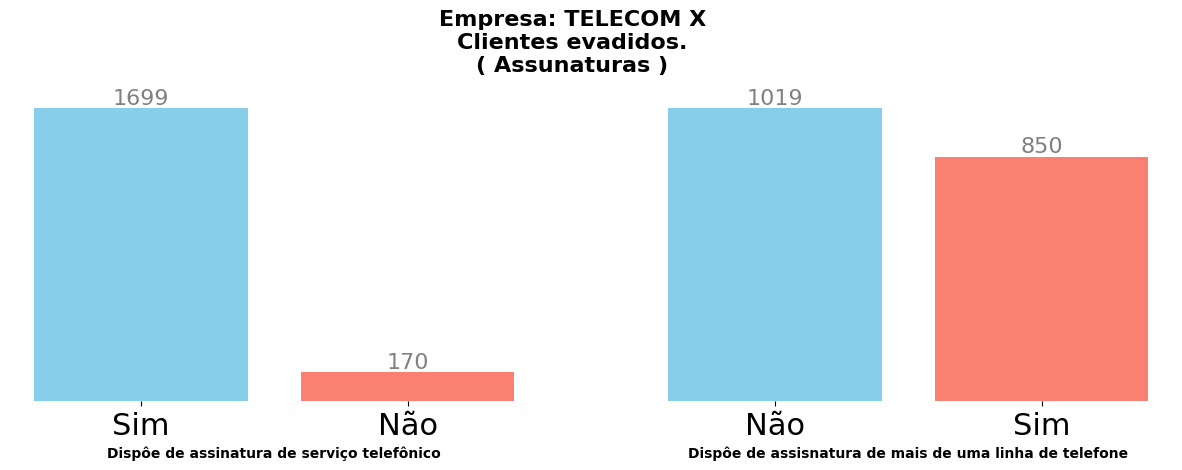

In [762]:
fig, ax = plt.subplots(1,2, figsize=(15, 4))
ax[0].bar(PhoneService_counts['Phone Service'], PhoneService_counts['Total'], color=['skyblue', 'salmon'])
# Adicionar rótulos e título
ax[0].set_xlabel('Dispôe de assinatura de serviço telefônico', fontweight='bold')

fig.suptitle('Empresa: TELECOM X\nClientes evadidos.\n( Assunaturas )', y=1.09, fontsize=16, fontweight='bold')

ax[0].xaxis.set_tick_params(labelsize=22)
ax[0].yaxis.set_ticks([])
ax[0].spines['top'].set_visible(False)
ax[0].spines['right'].set_visible(False)
ax[0].spines['bottom'].set_visible(False)
ax[0].spines['left'].set_visible(False)
# Adicionar os valores no topo das barras
for index, value in enumerate(PhoneService_counts['Total']):
    ax[0].text(index, value, str(value), ha='center', va='bottom', fontsize=16, color='gray')

ax[1].bar(MultipleLines_counts['Multiple Lines'], MultipleLines_counts['Total'], color=['skyblue', 'salmon'])
# Adicionar rótulos e título
ax[1].set_xlabel('Dispôe de assisnatura de mais de uma linha de telefone', fontweight='bold')
#ax[1].set_title('Empresa: TELECOM X\nClientes evadidos.', y=1.09, fontsize=16, fontweight='bold', loc='CENTER')
ax[1].xaxis.set_tick_params(labelsize=22)
ax[1].yaxis.set_ticks([])
ax[1].spines['top'].set_visible(False)
ax[1].spines['right'].set_visible(False)
ax[1].spines['bottom'].set_visible(False)
ax[1].spines['left'].set_visible(False)
# Adicionar os valores no topo das barras
for index, value in enumerate(MultipleLines_counts['Total']):
    ax[1].text(index, value, str(value), ha='center', va='bottom', fontsize=16, color='gray')

plt.show()

#📄Relatorio Final